# Preprocessing Workflow


🎯 This exercise will guide you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

🌤 We stored the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) in the cloud.

👇 Run the code down below to load the dataset and features you will be working with.

In [1]:
import pandas as pd

# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr', 
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values 
data = data[selected_features].copy()

# Showing the first five rows
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


📚 Take the time to do a ***preliminary investigation*** of the features by reading the ***dataset description*** available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## (1) Duplicates

ℹ️ ***Duplicates in datasets cause data leakage.*** 

👉 It is important to locate and remove duplicates.

❓ How many duplicated rows are there in the dataset ❓

<i>Save your answer under variable name `duplicate_count`.</i>

In [2]:
data.duplicated() # Check whether a row is a duplicated version of a previous row
duplicate_count = data.duplicated().sum() # Compute the number of duplicated rows
duplicate_count

300

❓ Remove the duplicates from the dataset. Overwite the dataframe `data`❓

In [3]:
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

1460

🧪 **Test your code**

In [4]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_duplicates.py::TestDuplicates::test_dataset_length PASSED     [ 50%]
tests/test_duplicates.py::TestDuplicates::test_duplicate_count PASSED    [100%]

============================== 2 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master


## (2) Missing data

❓ Print the percentage of missing values for every column of the dataframe. ❓

In [5]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

### `GarageFinish`

❓ **Questions** about `GarageFinish` ❓

Investigate the missing values in `GarageFinish`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [6]:
data['GarageFinish']

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [7]:
import numpy as np
data.GarageFinish.replace(np.nan, "NoGar", inplace = True) # Option 2: Replace missing GarageFinis values with mean

In [8]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGar'], dtype=object)

### `RoofSurface`

❓ **Questions** about `RoofSurface` ❓

Investigate the missing values in `RoofSurface`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [9]:
data['RoofSurface']

0       1995.0
1        874.0
2       1593.0
3       2566.0
4       3130.0
         ...  
1455    1698.0
1456    2645.0
1457     722.0
1458    3501.0
1459    3082.0
Name: RoofSurface, Length: 1460, dtype: float64

In [10]:
data.RoofSurface.replace(np.nan, data.RoofSurface.mean(), inplace = True)# Option 2: Replace missing roofvalues with mean
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
ChimneyStyle    0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

### `ChimneyStyle`

❓ **Questions** about `ChimneyStyle` ❓

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
    
* ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
    
* ⚠️ Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`...
</details>

In [11]:
data['ChimneyStyle']

0         bricks
1         bricks
2       castiron
3       castiron
4         bricks
          ...   
1455           ?
1456           ?
1457           ?
1458           ?
1459           ?
Name: ChimneyStyle, Length: 1460, dtype: object

In [12]:
data['ChimneyStyle'] = data['ChimneyStyle'].replace('?',np.NaN)
data['ChimneyStyle'] 

0         bricks
1         bricks
2       castiron
3       castiron
4         bricks
          ...   
1455         NaN
1456         NaN
1457         NaN
1458         NaN
1459         NaN
Name: ChimneyStyle, Length: 1460, dtype: object

In [13]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

ChimneyStyle    0.996575
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
RoofSurface     0.000000
GarageFinish    0.000000
CentralAir      0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

In [14]:
data.drop(columns='ChimneyStyle', inplace=True) # Drop WallMat column 

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


🧪 **Test your code**

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_nans PASSED       [ 50%]
tests/test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


❓ When you are done with handling missing value, print out the percentage of missing values for the entire dataframe ❓

You should no longer have missing values !

In [16]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

## (3) Scaling

###  `RoofSurface` 

❓ **Question** about `RoofSurface` ❓

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

<AxesSubplot:>

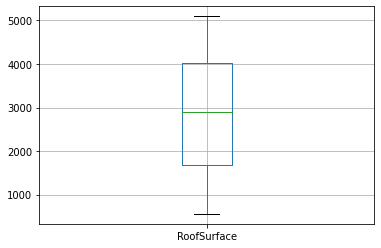

In [17]:
data[['RoofSurface']].boxplot()

(array([151., 150., 124., 124., 153., 166., 134., 156., 143., 159.]),
 array([ 558. , 1011.7, 1465.4, 1919.1, 2372.8, 2826.5, 3280.2, 3733.9,
        4187.6, 4641.3, 5095. ]),
 <BarContainer object of 10 artists>)

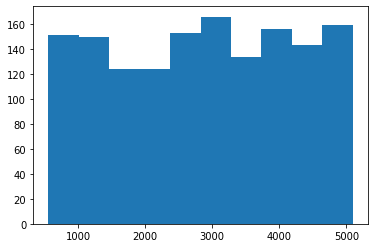

In [18]:
import matplotlib.pyplot as plt
 # Check feature distribution
plt.hist(data['RoofSurface'])

<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

(array([151., 150., 124., 124., 153., 166., 134., 156., 143., 159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

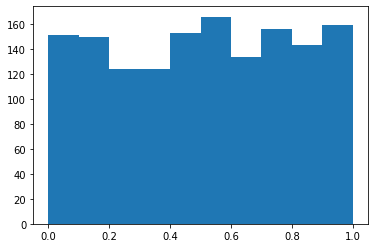

In [19]:
from sklearn.preprocessing import MinMaxScaler
MM_scaler = MinMaxScaler() # Instanciate MinMaxScaler

MM_scaler.fit(data[['RoofSurface']]) # Fit scaler to feature

data['RoofSurface'] = MM_scaler.transform(data[['RoofSurface']]) #Scale

plt.hist(data['RoofSurface'])

### `GrLivArea`

❓ **Question** about `GrLivArea` ❓

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns with the transformed values.

<AxesSubplot:>

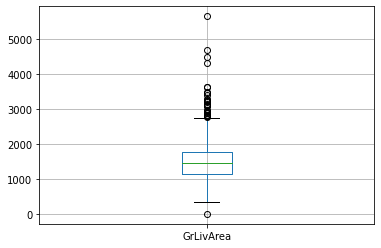

In [20]:
data[['GrLivArea']].boxplot()

(array([  5., 357., 641., 334.,  97.,  17.,   5.,   2.,   1.,   1.]),
 array([-1.0000e+00,  5.6330e+02,  1.1276e+03,  1.6919e+03,  2.2562e+03,
         2.8205e+03,  3.3848e+03,  3.9491e+03,  4.5134e+03,  5.0777e+03,
         5.6420e+03]),
 <BarContainer object of 10 artists>)

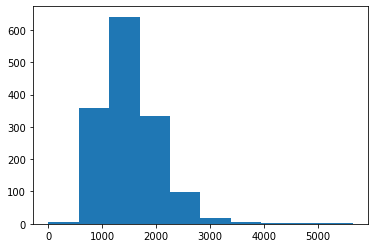

In [21]:
plt.hist(data['GrLivArea'])

<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

(array([  5., 357., 641., 334.,  97.,  17.,   5.,   2.,   1.,   1.]),
 array([-2.26342217, -1.39157976, -0.51973735,  0.35210506,  1.22394747,
         2.09578988,  2.96763229,  3.8394747 ,  4.71131711,  5.58315952,
         6.45500193]),
 <BarContainer object of 10 artists>)

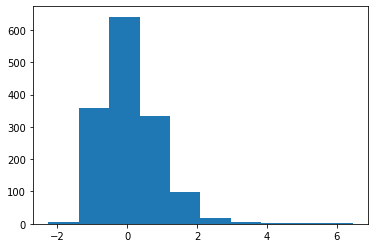

In [22]:
from sklearn.preprocessing import RobustScaler

r_scaler =  RobustScaler() # Instanciate  RobustScaler

r_scaler.fit(data[['GrLivArea']]) # Fit scaler to feature

data['GrLivArea'] = r_scaler.transform(data[['GrLivArea']]) #Scale

plt.hist(data['GrLivArea'])

### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

❓ **Questions** about `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` ❓

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scaler
2. Standard Scaler
3. Robust Scaler

Replace the original columns with the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.392e+03, 0.000e+00, 0.000e+00,
        6.500e+01, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

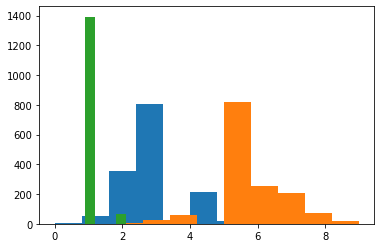

In [23]:
plt.hist(data['BedroomAbvGr'])
plt.hist(data['OverallCond'])
plt.hist(data['KitchenAbvGr'])

In [24]:
MM_scaler = MinMaxScaler() # Instanciate MinMaxScaler

MM_scaler.fit(data[['BedroomAbvGr']]) # Fit scaler to feature

data['BedroomAbvGr'] = MM_scaler.transform(data[['BedroomAbvGr']]) #Scale


MM_scaler.fit(data[['OverallCond']]) # Fit scaler to feature

data['OverallCond'] = MM_scaler.transform(data[['OverallCond']]) #Scale

In [25]:

MM_scaler.fit(data[['KitchenAbvGr']]) # Fit scaler to feature

data['KitchenAbvGr'] = MM_scaler.transform(data[['KitchenAbvGr']]) #Scale

🧪 **Test your code**

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.4.0
collecting ... collected 3 items

tests/test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED [ 33%]
tests/test_scaling.py::TestScaling::test_gr_liv_area PASSED              [ 66%]
tests/test_scaling.py::TestScaling::test_roof_surface PASSED             [100%]

============================== 3 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


## (4) Feature Engineering

### `GarageFinish`

❓ **Question** about `GarageFinish`❓

👇 Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 Hint</summary>
        
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

(array([422.,   0.,   0., 605.,   0.,   0., 352.,   0.,   0.,  81.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

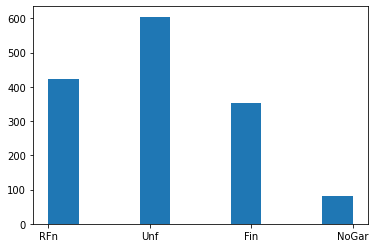

In [27]:
plt.hist(data['GarageFinish'])

In [28]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
data.GarageFinish.unique()  # Check unique values for streets (3)

array(['RFn', 'Unf', 'Fin', 'NoGar'], dtype=object)

In [29]:
ohe = OneHotEncoder(sparse = False) # Instantiate encoder

ohe.fit(data[['GarageFinish']]) # Fit encoder

GarageFinish_encoded = ohe.transform(data[['GarageFinish']]) # Encode alley

data["RFn"],data["Unf"],data['Fin'],data['NoGar'] = GarageFinish_encoded.T # Transpose encoded Alley back into dataframe

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice,RFn,Unf,Fin,NoGar
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000,0.0,0.0,1.0,0.0


In [30]:
data.drop(columns='GarageFinish', inplace=True) # Drop MoSold column 

### Encoding  `CentralAir`

❓ **Question** about `CentralAir`❓

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.


<details>
    <summary>💡 Hint</summary>
    
ℹ️ `CentralAir` is a binary categorical feature.
</details>

(array([1365.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          95.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

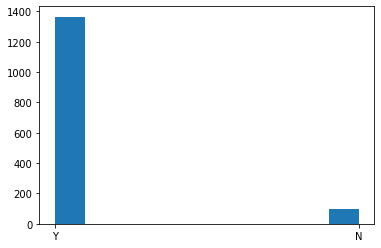

In [31]:
plt.hist(data['CentralAir'])

In [32]:
from sklearn.preprocessing import OneHotEncoder

data.CentralAir.unique() # Check unique values for streets (2)

ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instantiate encoder for binary feature

ohe.fit(data[['CentralAir']]) # Fit encoder

data['CentralAir'] = ohe.transform(data[['CentralAir']]) # Encode Street

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,RFn,Unf,Fin,NoGar
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,0.0,1.0,0.0


### `MoSold` - Cyclical engineering 

👨🏻‍🏫 A feature can be numerical (continuous or discrete), categorical or ordinal. But a feature can also be temporal (e.g. quarters, months, days, minutes, ...). 

Cyclical features need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature `MoSold`, the month on which the house was sold.

In [33]:
data["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
    * But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical faetures?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/ML_temporal_features.jpg" alt="Cyclical features" width="500" height="500">


2. Read this [article](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/) for more details.




❓ **Question** about `MoSold` ❓ 
- Create two new features `sin_MoSold` and `cos_MoSold` which correspond respectively to the sine and cosine of MoSold.
- Drop the original column `MoSold`

<details>
    <summary>💡 Hint</summary>
    
ℹ️ The perimeter of a circle if $C = 2 \pi r = 2 \pi$ and assuming that $ r = 1$
</details>

In [34]:
import math
data['sin_MoSold'] = data['MoSold'].apply(lambda x: np.sin(x*2*np.pi/12))


data['cos_MoSold'] = data['MoSold'].apply(lambda x: np.cos(x*2*np.pi/12))


data = data.drop(columns=['MoSold'])


In [35]:
# data.drop(columns='MoSold', inplace=True) # Drop MoSold column 

🧪 **Test your code**

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_encoding.py::TestEncoding::test_central_air PASSED            [ 25%]
tests/test_encoding.py::TestEncoding::test_columns PASSED                [ 50%]
tests/test_encoding.py::TestEncoding::test_month_sold_features PASSED    [ 75%]
tests/test_encoding.py::TestEncoding::test_month_sold_features_number PASSED [100%]

============================== 4 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


## (5) Export the preprocessed dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [37]:
data.to_csv("data/clean_dataset.csv", index=False)

🏁 Congratulations! Now, you know how to ***preprocess a dataset*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!